## Final Project Submission

Please fill out:
* Student name: James M. Irving, Ph.D.
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis, Jeff Herman
* Blog post URL:


In [1]:
# Custom functions written for this project are located in mod4functions_JMI.py in the main folder of this repo.
from mod4functions_JMI import *
# import sys,os
# sys.path.append(os.getcwd())

import bs_ds as bs
from bs_ds.imports import *

bs_ds v. 0.7.4 ... read the docs at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


In [2]:
# raise Exception("You don't want to 'run all'. Jump down to bookmark.")

## Loading Original Dataset and Combining it with Newly Harvested Tweets

In [3]:
df = pd.read_csv('russian_troll_tweets_eng_only_date_pub_index.csv', encoding='utf-8',index_col=0)

# Recast date_published as datetime and make index
df['date_published'] = pd.to_datetime(df['publish_date'])
df.set_index('date_published', inplace=True)

# Add label column troll_tweet, set =1 for original troll tweets
df['troll_tweet'] = 1

# Drop problematic nan in 'contet'
df.dropna(subset=['content'],inplace=True) # Dropping the 1 null value 

df.head(3)

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,external_author_id,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,troll_tweet
date_published,,,,,,,,,,,,,,
2017-10-01 19:58:00,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,RightTroll,1
2017-10-01 22:43:00,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,1
2017-10-01 23:52:00,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,1


## Retreiving Only Tweets with the Top 40 @'s

In [4]:
# Need to get a list of hash tags.
text_to_search_list = []

for i in range(len(df)):    
    tweet_contents =df['content'].iloc[i]
    text_to_search_list.append(tweet_contents)

# text_to_search_list[:2]

In [5]:
# Get all tweet tags and @'s from text_to_search_list

from mod4functions_JMI import get_tags_ats
tweet_tags, tweet_ats = get_tags_ats(text_to_search_list, show_counts=False)


print(f"There were {len(tweet_tags)} unique hashtags and {len(tweet_ats)} unique @'s\n")

# Create a dataframe with top_tags
df_top_tags = pd.DataFrame(tweet_tags.value_counts()[:40])#,'\n')
df_top_tags['% Total'] = (df_top_tags['tags']/len(tweet_tags)*100)

# Create a dataframe with top_ats
df_top_ats = pd.DataFrame(tweet_ats.value_counts()[:40])
df_top_ats['% Total'] = (df_top_ats['ats']/len(tweet_ats)*100)

# Display top tags and ats
# bs.display_side_by_side(df_top_tags,df_top_ats)

There were 832208 unique hashtags and 673442 unique @'s



In [6]:
df_top_tags[:10],df_top_ats[:10]

(                     tags    % Total
 #news              118624  14.254129
 #sports             45544   5.472670
 #politics           37452   4.500317
 #world              27077   3.253634
 #local              23130   2.779353
 #TopNews            14621   1.756893
 #health             10328   1.241036
 #business            9558   1.148511
 #BlackLivesMatter    8252   0.991579
 #tech                7836   0.941592,                    ats   % Total
 @midnight         6691  0.993553
 @realDonaldTrump  3532  0.524470
 @WarfareWW        1529  0.227043
 @CNN              1471  0.218430
 @HillaryClinton   1424  0.211451
 @POTUS            1035  0.153688
 @CNNPolitics       948  0.140769
 @FoxNews           930  0.138097
 @mashable          740  0.109883
 @YouTube           680  0.100974)

In [7]:
df_ats = pd.DataFrame()
for at in df_top_ats.index:
    df_ats = pd.concat([df_ats, df[df['content'].str.contains(at)]], axis=0)
#     df_ats = df.loc[at in df['content']==True]

### Loading in the new control tweets

In [8]:
# Load in harvest tweets
df_new = pd.read_csv('newly_extracted_control_tweets.csv',encoding='utf-8', index_col=0)

# Recast date_published as datetime and make index
df_new['date_published'] = pd.to_datetime(df_new['publish_date'])
df_new.set_index('date_published', inplace=True)

# Label the control tweets as troll_tweet=0
df_new['troll_tweet'] = 0

# Keep only non-retweeted tweets
df_new = df_new.loc[df_new['retweet']==0]

# Keep only english tweets
df_new = df_new.loc[df_new['language']=='en']

# Drop problematic nan in 'content'
df_new.dropna(subset=['content'],inplace=True)

df_new.head()

,external_author_id,author,content,region,following,followers,updates,post_type,account_type,retweet,account_category,publish_date,language,troll_tweet
date_published,,,,,,,,,,,,,,
2019-06-02 18:34:59,1.114658e+18,Draftdodgingdon,@realDonaldTrump it’s perfectly reasonable tha...,NaN,NaN,0.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,1.038424e+18,beapartofthemo1,RT @BelkissObadia: BREAKING NEWS: \n\n@realDon...,"Bradenton, FL",NaN,1198.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,8.798349e+17,BarbHuber9,@realDonaldTrump I thought you were supposed t...,NaN,NaN,1099.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,4.765020e+09,nonamehombre,RT @realDonaldTrump: Mexico is sending a big d...,NaN,NaN,69.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0
2019-06-02 18:34:59,8.244085e+17,letbuildthewall,RT @realDonaldTrump: Mexico is sending a big d...,NaN,NaN,18.0,NaN,control,control,False,control,2019-06-02 18:34:59,en,0


In [9]:
# Display Random Tweets
for i in range(10):
    print(i,'\t',np.random.choice(df_new['content']))

0 	 Tax payer assistance for aliens- Cash &amp; Medical Assistance while millions of Americans are homeless 😡 @realDonaldTrump @ACLJ @DonaldJTrumpJr @seanhannity @RepMattGaetz @The_Trump_Train  #QAnon #Cherokee #WhiteBuffalo #WWG1WGA #TRUMP2020   
https://t.co/58UZ9tmH7C https://t.co/AZlubp7hlV
1 	 RT @BET: .@BarackObama is in attendance tonight to support the Raptors in game 2! 👀 #NBAFinals Via:Raptors https://t.co/Ha21kBkq8U
2 	 RT @NBCNews: "If every unvaccinated child in the U.S. were vaccinated today, Friday, May 31," Dr. William Schaffner, an infectious disease…
3 	 RT @RobAnderson2018: My list of folks whom I admire that I hope some day follow me on this insular world, Twitter:
@tedlieu 
@BarackObama…
4 	 Doesn't fit their disgusting narrative. It's why they're the enemy of the people.
@jaketapper @ChrisCuomo @wolfblitzer @donlemon @AC360 https://t.co/J7RZHuUmPy
5 	 @Franklin_Graham @realDonaldTrump @POTUS Franklin Graham should lose his tax exempt status if he continues to push

### Concatenating Troll Tweets and New Tweets

In [10]:
# Confirming the columns of the old and new data match before concatenating
set(df.columns) == set(df_new.columns)

True

In [11]:
# Concatenate the dataframes then get a ProfileReport
df_full = pd.concat([df,df_new],axis=0)

from pandas_profiling import ProfileReport
ProfileReport(df_full)

C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Number of variables,15
Number of observations,1311933
Total Missing (%),6.9%
Total size in memory,150.1 MiB
Average record size in memory,120.0 B
Numeric,4
Categorical,8
Boolean,1
Date,1
Text (Unique),0
Rejected,1


#### Notes on Dataset:
- We do not have equal number of troll tweets and new tweets, so we will have to sample from the troll tweets to meet the # of new controls. 

### Save full csv

In [12]:
# Q_save = input('Save the data now?(y/n):')

# filename = 'combined_troll_and_control_tweets_en.csv'

# if Q_save =='y':
#     df_full.to_csv(filename,encoding='utf-8')
#     print(f'File saved as {filename}.')
# else: 
#     print('Ok, not saving the data.')
    
# Q_load = input(f'Load the file{filename}?(y/n):')
# if Q_load.lower()=='y':
#     print('ok. Loading csv...')
#     df_full = pd.read_csv(filename, encoding='utf-8',index_col=0)
# else:
#     print('ok. Did not load csv.')

In [13]:
df_full.head()

,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,region,retweet,troll_tweet,updates
date_published,,,,,,,,,,,,,,
2017-10-01 19:58:00,RightTroll,Right,10_GOP,"""We have a sitting Democrat US Senator on tria...",9.060000e+17,9636.0,1052.0,English,NaN,10/1/2017 19:58,Unknown,0,1,253.0
2017-10-01 22:43:00,RightTroll,Right,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,9.060000e+17,9637.0,1054.0,English,NaN,10/1/2017 22:43,Unknown,0,1,254.0
2017-10-01 23:52:00,RightTroll,Right,10_GOP,JUST IN: President Trump dedicates Presidents ...,9.060000e+17,9642.0,1062.0,English,NaN,10/1/2017 23:52,Unknown,0,1,256.0
2017-10-01 02:47:00,RightTroll,Right,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",9.060000e+17,9644.0,1050.0,English,NaN,10/1/2017 2:47,Unknown,0,1,247.0
2017-10-01 02:52:00,RightTroll,Right,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,9.060000e+17,9644.0,1050.0,English,NaN,10/1/2017 2:52,Unknown,0,1,249.0


### Resampling Data to Get Matching # of Target Labels

- Since there are many fewer new tweets, we will sample the same # from the larger Troll tweet collection

In [14]:
# Sampling a smaller dataset
new_tweet_length=len(df_full.loc[df_full['troll_tweet']==0]) # to match new tweets

df_small =pd.DataFrame()
df_small = df_full.loc[df_full['troll_tweet']==1].sample(new_tweet_length)

df_small= pd.concat([df_small, df_full.loc[df_full['troll_tweet']==0]], axis=0)
df_small['troll_tweet'].value_counts()

1    39086
0    39086
Name: troll_tweet, dtype: int64

## Saving/Loading the resampled data

In [15]:
from bs_ds.imports import *
from mod4functions_JMI import *
import bs_ds as bs

In [16]:
save_for_user=False
load_for_user=True
# ProfileReport(df_small)
if save_for_user==True:
    df_small.to_csv('small_russian_tweets_control_tweets_df.csv',encoding='utf-8')

if load_for_user==True:
    df_small = pd.read_csv('small_russian_tweets_control_tweets_df.csv',index_col=0)
    df_small.head(2)

In [17]:
# Creating 2 df: one for trolls and one for controls
df_sm_troll = df_small.loc[df_small['troll_tweet']==1]
df_sm_contr = df_small.loc[df_small['troll_tweet']==0]

In [18]:
# Clearing out memory
df_full = []
df_new = []
df = []

# Text Processing: tokenizing, removing stopwords, urls, hashtags

In [19]:
## Tokenizing dataframes
df_tokenize = df_small[['content','troll_tweet']].copy()
df_tokenize.head()

,content,troll_tweet
date_published,,
2017-01-10 17:24:00,Feds: More than 800 career programs are failin...,1
2016-07-05 23:41:00,#Breaking: Alleged Dead Man Inc. gang member i...,1
2016-04-06 17:35:00,"#health No more dipping or chewing at Mets, Ya...",1
2017-08-07 14:14:00,alozrasT Ppl come &amp; want to change USA pol...,1
2015-07-25 23:40:00,Seahawks training camp: Five things to watch f...,1


### Tokenizing the dataframe with Spacy

In [20]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize
import spacy

In [21]:
texts_to_tokens = df_tokenize['content'].values
print(type(texts_to_tokens))
texts_to_tokens[:5]

<class 'numpy.ndarray'>


array(['Feds: More than 800 career programs are failing grads https://t.co/WxlCa12plB https://t.co/uR6NKjgtQS',
       '#Breaking: Alleged Dead Man Inc. gang member indicted in 2008 murder-for-hire https://t.co/clABJ0m1qO',
       '#health No more dipping or chewing at Mets, Yankees games',
       "alozrasT Ppl come &amp; want to change USA political structure.Don't come! Its like clothes shoppin! Theres something… https://t.co/R8wQGHWukn",
       'Seahawks training camp: Five things to watch for  #local'],
      dtype=object)

#### Tokenizing Partially cleaned text

In [22]:
# Try it with Spacy
import spacy
# nlp = spacy.load("en_core_web_lg")#)
nlp = spacy.load("en_core_web_md")
nlp.max_length=3000000

In [23]:
# Maybe make this save the tag objects instead?
def make_spacy_objects(nlp, sentence):
    doc = nlp(sentence)
    return doc

# df_tokenize['spacy'] = df_tokenize['content'].apply(lambda x: make_spacy_objects(nlp, x))
df_tokenize['tokens'] = df_tokenize['content'].apply(lambda x: nlp(x))

In [24]:
# Generate bags of words from tokenized column
troll_sents = df_tokenize.groupby('troll_tweet').get_group(1)['tokens']
contr_sents = df_tokenize.groupby('troll_tweet').get_group(0)['tokens']

troll_sents[:4]

date_published
2017-01-10 17:24:00    (Feds, :, More, than, 800, career, programs, a...
2016-07-05 23:41:00    (#, Breaking, :, Alleged, Dead, Man, Inc., gan...
2016-04-06 17:35:00    (#, health, No, more, dipping, or, chewing, at...
2017-08-07 14:14:00    (alozrasT, Ppl, come, &, amp, ;, want, to, cha...
Name: tokens, dtype: object

## Tokenizing the raw text with nltk's word_tokenize

In [25]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize

In [26]:
print(df_sm_troll.shape)
print(df_sm_contr.shape)

(39086, 14)
(39086, 14)


In [27]:
# Combine text for trolls and controls
text_troll_raw = ' '.join(df_sm_troll['content'])
text_contr_raw =' '.join(df_sm_contr['content'])

### Using RegularExpressions to extract and replace Urls, Hashtags, and Mentions

In [28]:
import re

# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
text_troll = urls.sub(' ',text_troll_raw)
text_contr = urls.sub(' ',text_contr_raw)


# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

troll_tags = hashtags.findall(text_troll)
text_troll = hashtags.sub(' ',text_troll)

control_tags = hashtags.findall(text_contr)
text_contr = hashtags.sub(' ',text_contr)


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

troll_mentions = mentions.findall(text_troll)
text_troll = mentions.sub(' ',text_troll)

control_mentions = mentions.findall(text_contr)
text_contr = mentions.sub(' ',text_contr)

In [29]:
## Tokenizing with nltk's word_tokenize
# Tokenize cleaned text
token_troll = word_tokenize(text_troll)
token_contr = word_tokenize(text_contr)

#### Removing Stopwords

In [30]:
# Generate Stopwords List
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','``','co','“','’','‘','”','rt',"n't","''","RT",'u','s',"'s"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

In [31]:
# Filter Out Stopwords
text_troll_stopped = [x.lower() for x in token_troll if x.lower() not in stopwords_list]
text_contr_stopped = [x.lower() for x in token_contr if x.lower() not in stopwords_list]

# # Tokenize stopped words
# text_troll_tokens = word_tokenize(' '.join(text_troll_stopped))
# text_contr_tokens = word_tokenize(' '.join(text_contr_stopped))

# Regexp_tokenize stopped words (to keep contractions)
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
text_troll_tokens = nltk.regexp_tokenize(' '.join(text_troll_stopped),pattern)
text_contr_tokens = nltk.regexp_tokenize(' '.join(text_contr_stopped),pattern)

### Generating Frequency Distribtuions

In [32]:
from nltk import FreqDist
# freq_trolls = FreqDist(text_troll_stopped)
# freq_controls = FreqDist(text_contr_stopped)

freq_trolls = FreqDist(text_troll_tokens)
freq_controls = FreqDist(text_contr_tokens)

print(freq_trolls.most_common(50))
print(freq_controls.most_common(50))

[('trump', 3047), ('police', 1404), ('workout', 1349), ('new', 1299), ('man', 1289), ('obama', 894), ('breaking', 835), ('says', 826), ('u', 784), ('s', 775), ('people', 731), ('video', 706), ('state', 651), ('president', 641), ('one', 633), ('get', 622), ('us', 601), ('like', 590), ('m', 580), ('black', 574), ('woman', 571), ('killed', 568), ('year', 555), ('day', 538), ('hillary', 534), ('shooting', 517), ('time', 507), ('white', 502), ('clinton', 500), ('amp', 484), ('need', 451), ('first', 445), ('house', 436), ('city', 433), ('dead', 431), ('america', 428), ('exercise', 421), ('fire', 417), ('make', 416), ('good', 416), ('old', 415), ('look', 401), ('shot', 400), ('say', 399), ('back', 396), ('school', 393), ('home', 391), ('go', 391), ('news', 388), ('death', 385)]
[('trump', 5111), ('mexico', 2856), ('want', 2852), ('years', 2829), ('big', 2600), ('talk', 2495), ('border', 2440), ('president', 2387), ('problem', 2365), ('people', 2249), ('talking', 2219), ('sending', 2031), ('de

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4F23F55F8>,
       dtype=object))

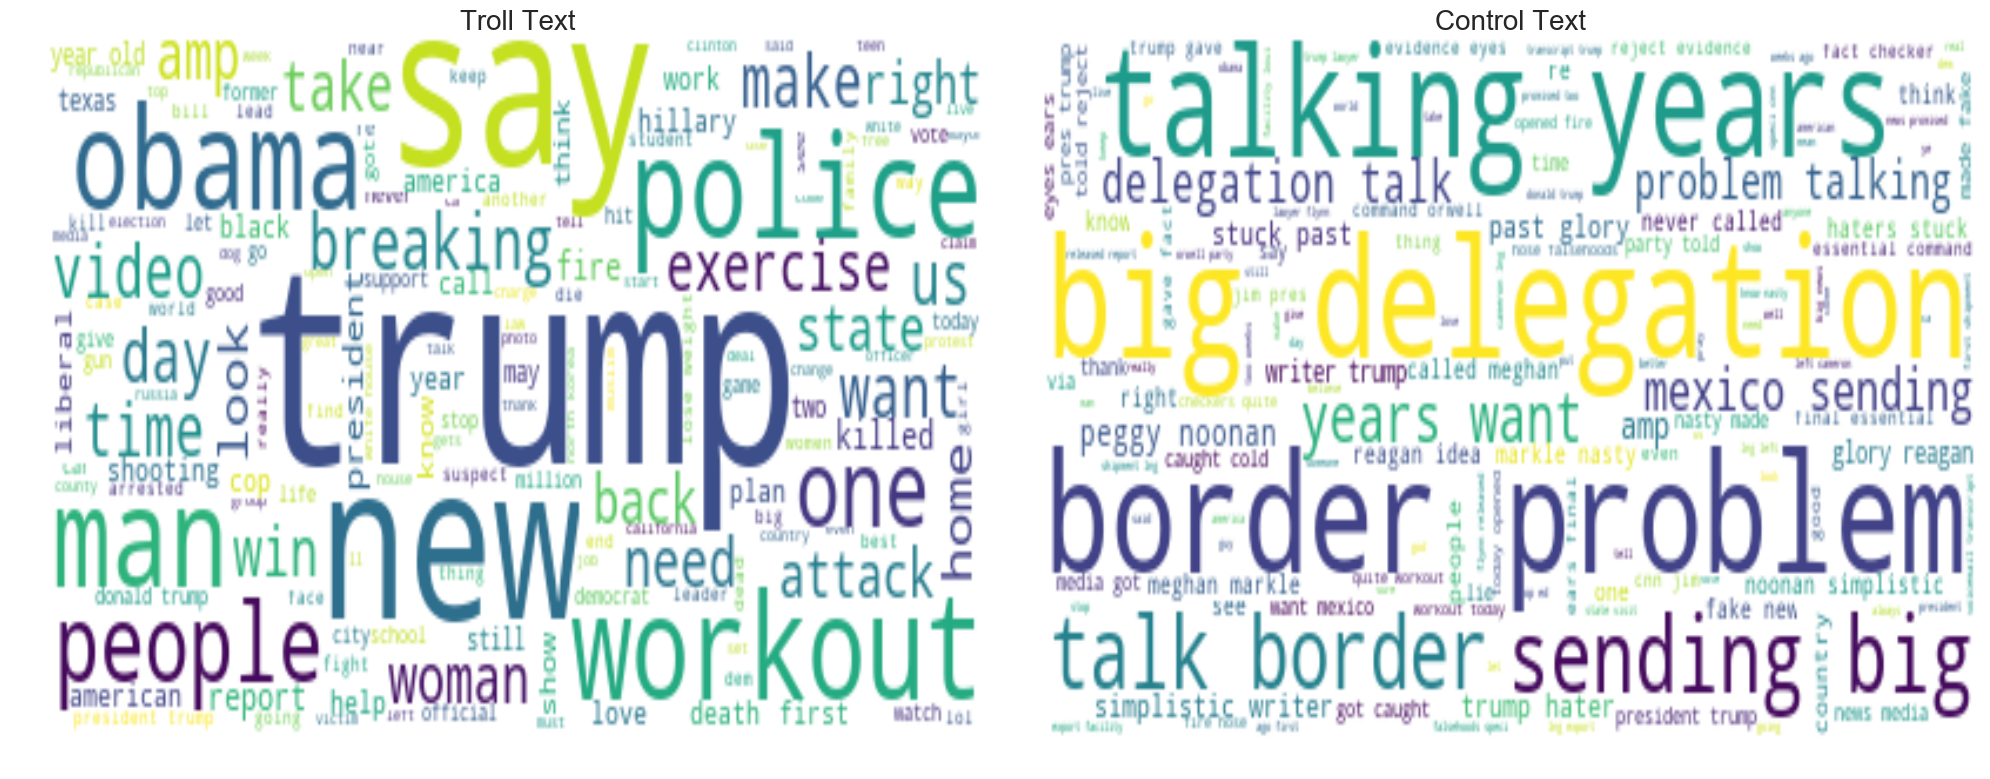

In [33]:
# compare_word_cloud(text_troll_tokens,'Troll Text',text_contr_tokens,'Control Text')
compare_word_cloud(text_troll_stopped,'Troll Text',text_contr_stopped,'Control Text')

### Lemmatizing

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
troll_lemma = [lemmatizer.lemmatize(w) for w in text_troll_tokens]
contr_lemma = [lemmatizer.lemmatize(w) for w in text_contr_tokens]

(<Figure size 2000x1500 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4FBCF7EF0>,
       dtype=object))

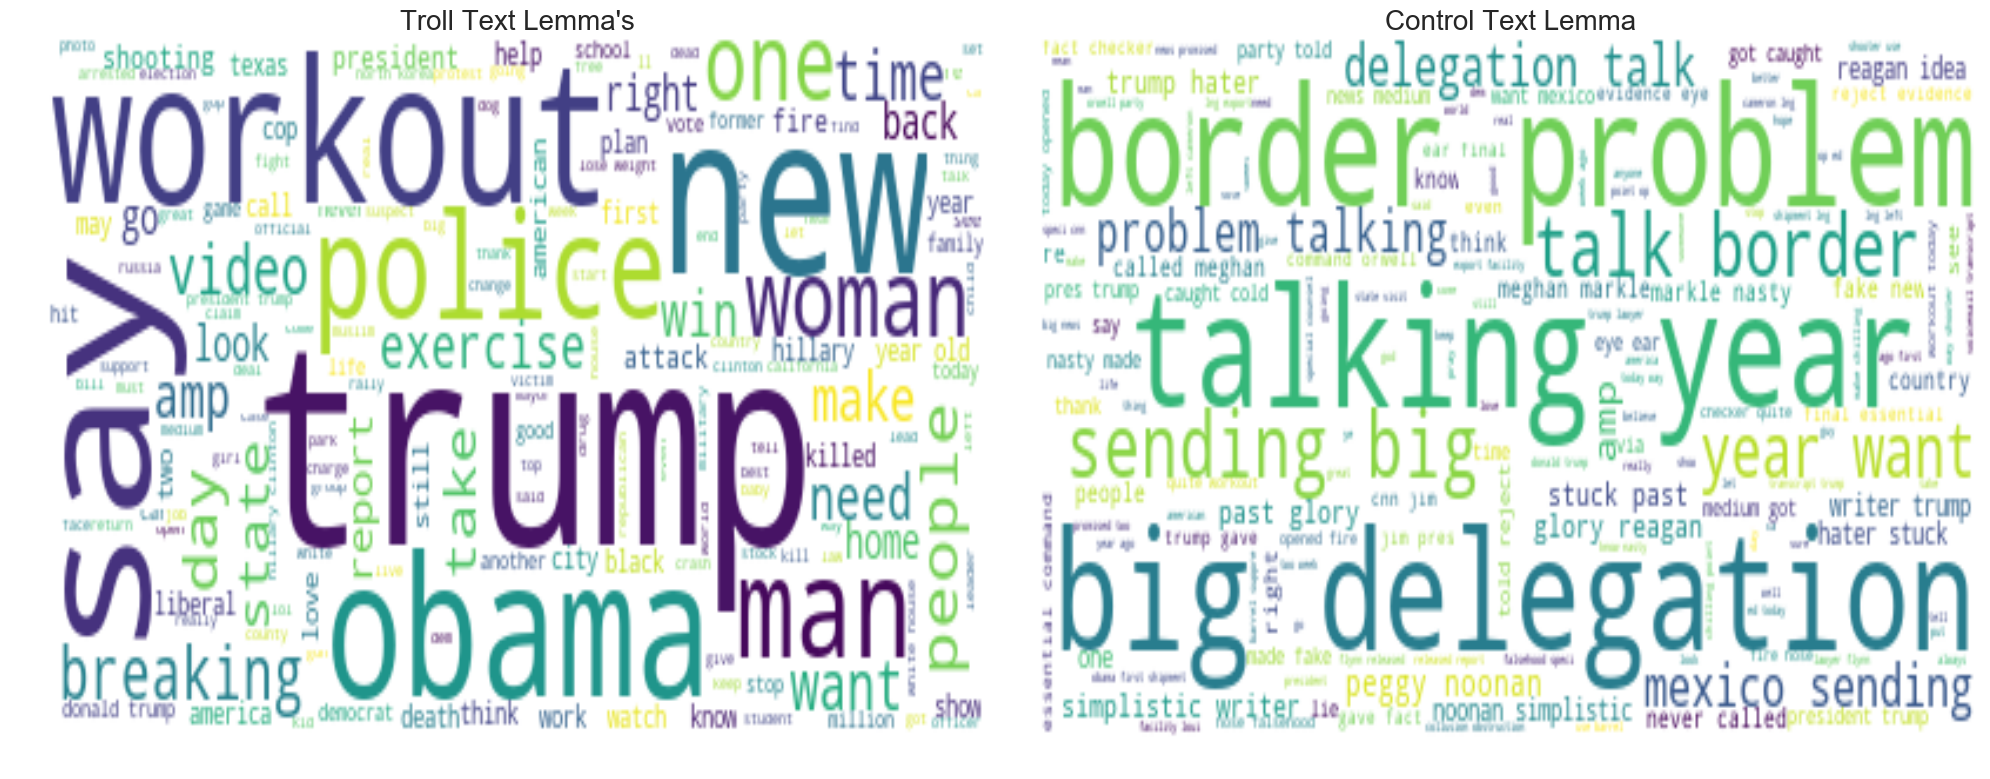

In [37]:
#...now what???
compare_word_cloud(troll_lemma,"Troll Text Lemma's",contr_lemma,"Control Text Lemma")

## Creating Bigrams and PMI scores

### Bigrams

In [38]:
from nltk.collocations import *

In [39]:
bigram_measures =nltk.collocations.BigramAssocMeasures()

troll_finder = BigramCollocationFinder.from_words(text_troll_tokens)
troll_scored = troll_finder.score_ngrams(bigram_measures.raw_freq)

contr_finder = BigramCollocationFinder.from_words(text_contr_tokens)
contr_scored = contr_finder.score_ngrams(bigram_measures.raw_freq)


In [43]:
quick_table(contr_scored[:20], col_names =['Bigram','Normalized Frequency?'],caption='Control Tweel Bigrams');

,Bigram,Normalized Frequency?
0,"('border', 'problem')",0.00540478
1,"('big', 'delegation')",0.00538331
2,"('talking', 'years')",0.00538063
3,"('sending', 'big')",0.00537526
4,"('talk', 'border')",0.00537526
5,"('years', 'want')",0.00537526
6,"('delegation', 'talk')",0.00537258
7,"('mexico', 'sending')",0.00537258
8,"('problem', 'talking')",0.00537258
9,"('peggy', 'noonan')",0.00244476


In [44]:
quick_table(troll_scored[:20],col_names=['Bigram','Normalized Frequency?'], caption='Troll Tweet Bigrams');

,Bigram,Normalized Frequency?
0,"('u', 's')",0.00235831
1,"('year', 'old')",0.00104455
2,"('donald', 'trump')",0.000958401
3,"('president', 'trump')",0.000857895
4,"('lose', 'weight')",0.000757388
5,"('north', 'korea')",0.000678419
6,"('white', 'house')",0.000638934
7,"('hillary', 'clinton')",0.000570733
8,"('islamic', 'state')",0.0004451
9,"('new', 'orleans')",0.000441511


### Pointwise Mutual Information Score

In [46]:
troll_pmi_finder = BigramCollocationFinder.from_words(text_troll_tokens)
troll_pmi_finder.apply_freq_filter(5)

troll_pmi_scored = troll_pmi_finder.score_ngrams(bigram_measures.pmi)
troll_pmi_df = pd.DataFrame.from_records(troll_pmi_scored[:20],columns=['Bigram','PMI Score'])
display(troll_pmi_df.style.set_caption('Troll Tweets'))
# quick_table(troll_pmi_scored)

,Bigram,PMI Score
0,"('bowe', 'bergdahl')",15.7659
1,"('roller', 'coaster')",15.7659
2,"('angelina', 'jolie')",15.5028
3,"('burkina', 'faso')",15.5028
4,"('burnt', 'crisp')",15.5028
5,"('dalai', 'lama')",15.5028
6,"('coral', 'gables')",15.2804
7,"('drwright', 'congr')",15.2804
8,"('fiat', 'chrysler')",15.2804
9,"('klux', 'klan')",15.2804


In [48]:
contr_pmi_finder = BigramCollocationFinder.from_words(text_contr_tokens)
contr_pmi_finder.apply_freq_filter(5)
contr_pmi_scored = contr_pmi_finder.score_ngrams(bigram_measures.pmi)

# contr_pmi_scored
contr_pmi_df = pd.DataFrame.from_records(contr_pmi_scored[:20], columns=['Bigrams','PMI Score'])
display(contr_pmi_df.style.set_caption('Control Tweets'))

,Bigrams,PMI Score
0,"('disappearance', 'connecticut')",16.1855
1,"('uscis', 'ignor')",16.1855
2,"('advisers', 'departing')",15.9224
3,"('babyhands', 'mcgrifter')",15.9224
4,"('bryan', 'stevenson')",15.9224
5,"('computer', 'intrusions')",15.9224
6,"('grounding', 'airline')",15.9224
7,"('haberman', 'sycophancy')",15.9224
8,"('intimidating', 'construc')",15.9224
9,"('rio', 'grande')",15.9224


___

## Sentiment Analysis with VADER

In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\james\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate sid
sid = SentimentIntensityAnalyzer()

# Create a column of sentiment_scores
df_tokenize['sentiment_scores'] = df_tokenize['content'].apply(lambda x: sid.polarity_scores(x))
# Returns:
# {'neg': 0.03, 'neu':0.2, 'pos':0.45, 'compound':0.34}

# To extract the compound scores (overall score)
df_tokenize['compound_score'] = df_tokenize['sentiment_scores'].apply(lambda dict: dict['compound'])

# TO simplify to a sentiment_class
df_tokenize['sentiment_class'] = df_tokenize['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')

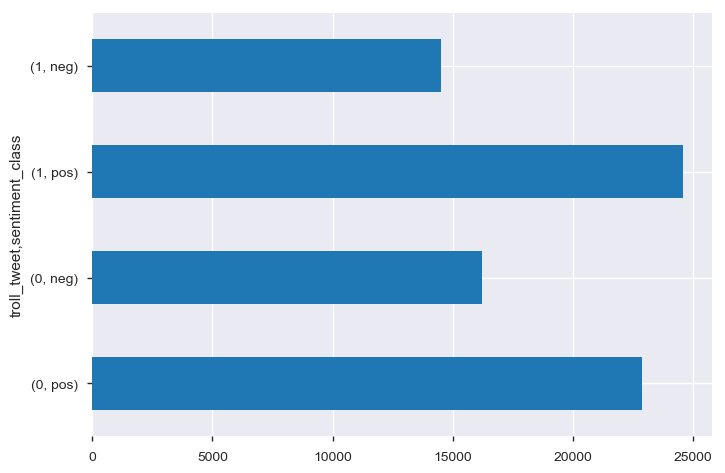

In [51]:
df_tokenize.groupby('troll_tweet')['sentiment_class'].value_counts().plot(kind='barh')

In [52]:
df_tokenize.groupby('troll_tweet')['sentiment_class'].value_counts().unstack()

sentiment_class,neg,pos
troll_tweet,,
0,16219,22867
1,14506,24580


In [53]:
plot_troll_sent = df_tokenize.groupby('troll_tweet').get_group(1)['sentiment_class'].value_counts()
plot_contr_sent = df_tokenize.groupby('troll_tweet').get_group(0)['sentiment_class'].value_counts()

print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_troll_sent_norm = plot_troll_sent/(sum(plot_troll_sent))
print('\tNormalized Troll Classes:\n',plot_troll_sent_norm)

# Normalized % of control sentiment classes
plot_contr_sent_norm = plot_contr_sent/(sum(plot_contr_sent))
print('\n\tNormalized Control Classes:\n',plot_contr_sent_norm)

RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:
 ------------------------------------------------------------
	Normalized Troll Classes:
 pos    0.62887
neg    0.37113
Name: sentiment_class, dtype: float64

	Normalized Control Classes:
 pos    0.585043
neg    0.414957
Name: sentiment_class, dtype: float64


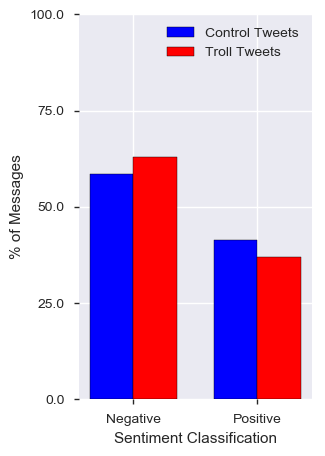

In [58]:
# Plot sentiment analysis classification
fig, ax = plt.subplots(figsize=(3,5))
width=0.35
ind = np.arange(0,2)
# ax.set_aspect(0.9)
ax.bar(ind, height=plot_contr_sent_norm, width=width, 
       label='Control Tweets',color='b',edgecolor='k')
ax.bar(ind+width, height=plot_troll_sent_norm,width=width,
       label='Troll Tweets',color='r',edgecolor='k')
ax.set_ylim(0,1)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Negative','Positive'])
ax.set_xlabel('Sentiment Classification')

y_ticks = np.linspace(0,1,num=5)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks*100)
ax.set_ylabel('% of Messages')
ax.legend()
ax.autoscale_view()

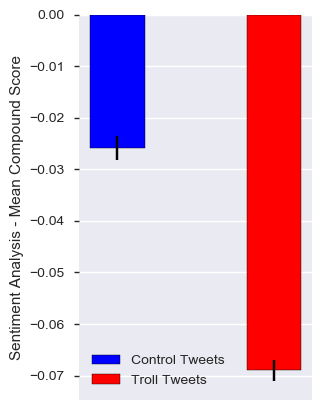

In [57]:
import seaborn as sns

# Plot sentiment analysis compound scores
plot_troll_comp = df_tokenize.groupby('troll_tweet').get_group(1)['compound_score'].values
plot_contr_comp = df_tokenize.groupby('troll_tweet').get_group(0)['compound_score'].values

# Plot sentiment ompound scores
from scipy.stats import sem
fig, ax = plt.subplots(figsize=(3,5))

width=0.35
ind = np.arange(0,2)

# sns.boxplot(df_tokenize.groupby('troll_tweet')['compound_score'].mean())
ax.bar(ind[0],height=plot_contr_comp.mean(), yerr=sem(plot_contr_comp), width=width, 
       label='Control Tweets',color='b',edgecolor='k')
ax.bar(ind[1],height=plot_troll_comp.mean(),yerr=sem(plot_troll_comp),width=width,
       label='Troll Tweets',color='r',edgecolor='k')
ax.legend()
ax.set_xticks([])
# ax.set_xticklabels(['Negative','Positive'])
ax.set_ylabel('Sentiment Analysis - Mean Compound Score')
# y_ticks = np.linspace(0,1,num=5)
# ax.set_yticks(y_ticks)
# ax.set_yticklabels(y_ticks*100)
# ax.set_ylabel('% of Messages')
# ax.legend()
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.autoscale_view()

# BOOKMARK - LOAD HERE -  -  - Starting with Keras

In [ ]:
PAUSE

In [ ]:
import bs_ds as bs
from bs_ds.imports import *
from mod4functions_JMI import clean_text

In [ ]:
# Loading in the dataframe from earlier
check = input('Use saved csv?(y/n):')
if check.lower()=='y':
    df_tokenize = pd.read_csv('full_tokenized_tweets_for_keras.csv', encoding='utf-8', index_col=0)
else:
    print('ok, skipping read_csv.')

### def clean_text

- earlier methods of using re's to remove urls, hashtags, mentions, and stopwords were all combined into the `clean_text` function, which is the in mod4function_JMI.py module in the repo folder. 
- Here is a snipper of its docstring:
``` python
def clean_text(series,is_tokens=False,as_tokens=False, urls=True, hashtags=True, mentions=True, stopwords=True, verbose=False):
        """Accepts a series/df['column'] and tokenizes, removes urls, hasthtags, and @s using regex before tokenizing and removing stopwrods"""
```

In [ ]:
##MINIMAL REQUIRED REGEX AND STOPWORDS CODE
from nltk.corpus import stopwords
import string
# Generate Stopwords List
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','``','co','“','’','‘','”',
                   'rt',"n't","''","RT",'u','s',"'s"]#,'@','#']
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

# Remove urls with regex
import re
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
hashtags = re.compile(r'(\#\w*)')
mentions = re.compile(r'(\@\w*)')

In [ ]:

test_series = df_tokenize['tokens']

# clean_series = remove_stopwords(test_series)
clean_series= clean_text(test_series)

idx = np.random.choice(range(len(clean_series)),10,replace=False,)
print(test_series[idx], '\n\n',clean_series[idx])

In [ ]:

# df_tokenize.to_csv('full_tokenized_tweets_for_keras.csv', encoding='utf-8')
# df_tokenize.set_index('date_published')
df_tokenize.head(2)

In [ ]:
df_tokenize.drop('text_for_vectors',axis=1,inplace=True)

In [ ]:
from nltk import word_tokenize, regexp_tokenize
# # Tokenizing dataframe text
# df_sm_contr['content'].map(lambda x: nltk.regexp_tokenize(x,pattern))
# df_sm_troll['content'].map(lambda x: nltk.regexp_tokenize(x,pattern))

# # Removing url links
# df_sm_contr['content'].map(lambda x: urls.sub(' ', x))
# df_sm_troll['content'].map(lambda x: urls.sub(' ', x))
# # # Removing hastags links
# # df_sm_contr['content'].map(lambda x: hashtags.sub(' ', x))
# # df_sm_troll['content'].map(lambda x: hashtags.sub(' ', x))

# # Removing mentions links
# df_sm_contr['content'].map(lambda x: mentions.sub(' ', x))
# df_sm_troll['content'].map(lambda x: mentions.sub(' ', x))

# # Removing only specific over-represented words 
# # i.e. RT, @RealDonaldTrump?
# remove_words = re.compile(r'[.?]RT[.?]')
# ---------------------------------------------------------------------------------------
# Using df_tokenized instead

# Removing url links
df_tokenize['text_for_vectors'] = df_tokenize['content'].copy()
df_tokenize['text_for_vectors'] = df_tokenize['text_for_vectors'].apply(lambda x: urls.sub(' ', x))

# # Removing hastags links
df_tokenize['text_for_vectors'] = df_tokenize['text_for_vectors'].apply(lambda x: hashtags.sub(' ', x))

# # Removing mentions links
df_tokenize['text_for_vectors'] = df_tokenize['text_for_vectors'].apply(lambda x: mentions.sub(' ', x))

# # Tokenizing dataframe text
# df_tokenize['text_for_vectors'] = df_tokenize['text_for_vectors'].apply(lambda x: nltk.regexp_tokenize(x,pattern))

# # tokenize content
df_tokenize['nltk_tokens'] = df_tokenize['text_for_vectors'].apply(lambda x: word_tokenize(x))



# Removing only specific over-represented words 
# i.e. RT, @RealDonaldTrump?
# remove_words = re.compile(r'[.?]RT[.?]')

In [ ]:
df_tokenize['nltk_tokens'][0]

## Switching to Bigger-Picture Metrics 

## Vectorization
- to do these tasks, must do tokenziation and other cleaning steps in the original dataframe so structure/context is not lost

- for this section, we will leave the hashtags and @'s in the messages, and will only remove url links
- will leave stopwords in for now

In [ ]:
# df_tokenize.head()

In [ ]:
df_tokenize.head()

In [ ]:
# troll_content = df_sm_troll['content'].to_list()
# contr_content = df_sm_contr['content'].to_list()
# troll_content[:3], contr_content[:3]

### Using Word2Vec

In [ ]:
troll_tokenized_content = df_tokenize.groupby('troll_tweet').get_group(1)['nltk_tokens']
contr_tokenized_content = df_tokenize.groupby('troll_tweet').get_group(0)['nltk_tokens']
troll_tokenized_content[:10]

In [ ]:
from gensim.models import Word2Vec

troll_model = Word2Vec(troll_tokenized_content, size=100, window=5, min_count=1, workers=4)
contr_model = Word2Vec(contr_tokenized_content, size=100, window=5, min_count=1, workers=4)

troll_model.train(troll_tokenized_content, total_examples=troll_model.corpus_count, epochs=10 )
contr_model.train(contr_tokenized_content, total_examples=contr_model.corpus_count, epochs=10 )

wv_troll = troll_model.wv
wv_contr = contr_model.wv

In [ ]:
len(wv_troll.vocab),len(wv_contr.vocab)

In [ ]:
## PRINT OUT SIMILAR WORDS
words_to_check = ['trump','democrat','vote']
for word in words_to_check:
    print(f'\n{word.upper()}', '----'*20)
    if word in wv_troll.vocab:
        print(f"\nTroll:{word}:\n\t{wv_troll.most_similar(word)}")
        
    if word in wv_contr.vocab:
        print(f"\nControl: {word}:\n\t{wv_contr.most_similar(word)}")    

In [ ]:
# If i wanted to use these vectors with Keras
# wv_troll['trump']

# BUILDING THE MODELS

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Keras preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical

# Keras neural network basics
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
# # df = pd.read_csv('combined_troll_and_control_tweets_en.csv')

# df.set_index('date_published',inplace=True)
# df.head()
# tweets = df['']

In [ ]:
# df.head()

In [ ]:
bs.inspect_df(df_tokenize)

In [ ]:
len(df_tokenize)

## Creating a Baseline Model with Logistic Regression

### Train, test, val split

In [ ]:
X_contr = df_tokenize.groupby('troll_tweet').get_group(0)[['text_for_vectors','troll_tweet']]#[['content','troll_tweet']]

X_troll = df_tokenize.groupby('troll_tweet').get_group(1)[['text_for_vectors','troll_tweet']]#[['content','troll_tweet']]
X_troll = X_troll.sample(len(X_contr))

# Recombine resampled X's an pop off y
df_resampled = pd.concat([X_contr, X_troll],axis=0)

y = df_resampled.pop('troll_tweet').values
X_array = df_resampled.values.reshape(-1)

print(X_contr.shape, X_troll.shape)
print(X_array.shape, y.shape)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

sentences_train, sentences_test, y_train, y_test = train_test_split(X_array, y)
sentences_test, sentences_val, y_test, y_val = train_test_split(sentences_test,y_test,test_size=0.2)
print('Train:',sentences_train.shape, len(y_train),'\nTest', sentences_test.shape, len(y_test))
print('\nVal:',sentences_val.shape, len(y_val))

In [ ]:
# Vectorization
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)
X_val = vectorizer.transform(sentences_val)
# X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Accuracy: ",score)

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
y_hat_test = clf.predict(X_test)
print(classification_report(y_test, y_hat_test))


bs.plot_confusion_matrix(confusion_matrix(y_test, y_hat_test),['Control Tweets','Troll Tweets'])
cm_output = confusion_matrix(y_test, y_hat_test)

In [ ]:
print("Control Tweets")
print(cm_output[0], '=',cm_output[0].sum(),'\n')

print("Troll Tweets")
print(cm_output[1], '=',cm_output[1].sum())

### INITIAL MODEL SUMMARY: Logistic Regression
- 0.98% accuracy and recall


## Keras Model 1: creating a Text Classification Neural Network in Keras

In [ ]:
# from gensim.models import Word2Vec

# wv = Word2Vec(df_tokenize['text_for_vectors'], size=100, window=5, min_count=1, workerrs=4)

# X_train[0]

In [ ]:
# from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(sentences_train)

# sequences_train = tokenizer.texts_to_sequences(sentences_train)

In [ ]:
# np.shape(sequences_train)

In [ ]:
from keras import models, layers, optimizers
input_dim = X_train.shape[1]
# input_dim = sequences_train.shape[1]
print(input_dim)

model1 = models.Sequential()
# model.add(layers.Embedding)
model1.add(layers.Dense(10, input_dim= input_dim, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

In [ ]:
clock = bs.Clock()
clock.tic('starting keras .fit')

history = model1.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_val, y_val), batch_size=100)

clock.toc('completed 5 epochs')

In [ ]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print(f'Training Accuracy:{accuracy}')

loss, accuracy = model1.evaluate(X_test, y_test, verbose=True)
print(f'Testing Accuracy:{accuracy}')

In [ ]:
def plot_history(history):
    acc = history.history['acc']
    loss = history.history['loss']
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']
    x = range(1,len(acc)+1)
    
    fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
    ax[0].plot(x, acc,'b',label='Training Acc')
    ax[0].plot(x, val_acc,'r',label='Validation Acc')
    ax[0].legend()
    ax[1].plot(x, loss,'b',label='Training Loss')
    ax[1].plot(x, val_loss, 'r', label='Validation Loss')
    ax[1].legend()
    plt.show()
plot_history(history)

In [ ]:
# from keras.utils import plot_model
# plot_model(model1, show_shapes=True,to_file='model1.png')

# from IPython.display import SVG
# from keras.utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# model1_img =plt.imread('model1.png')
# plt.imshow(model1_img)

### Summary - Neural Network Analysis on CountVectorized Tweets

- Initial Network with CountVectorized tweets, with only a training and testing set (need to add validation set), got 97.68% accuracy witin 5 epochs!


# BOOKMARK - END OF 06/04/19

### Keras Model 1B
- Adding Word2Vec vectorization into an embedding layer

In [ ]:
# Using Word2Vec's vectors in EMbedding Layer
wv_keras = Word2Vec(df_tokenize['text_for_vectors'], size=100, window=5, min_count=1, workers=4)
wv_keras.train(df_tokenize['text_for_vectors'],total_examples=wv_keras.corpus_count, epochs=10)

In [ ]:
sentences_train = df_tokenize['text_for_vectors']
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences_train)

sequences_train = tokenizer.texts_to_sequences(sentences_train)
sequences_train[0]

In [ ]:
https://adventuresinmachinelearning.com/word2vec-keras-tutorial/
    https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [ ]:
# embedding_layer = wv_keras.wv.get_keras_embedding()
# help(embed_matrix)

In [ ]:
from keras import models, layers, optimizers, regularizers
input_dim = sequences_train.shape[1]
# input_dim = sequences_train.shape[1]
print(input_dim)

model1B = models.Sequential()
# embedding_layer =

model1B.add(wv_keras.wv.get_keras_embedding(train_embeddings=False))
#     len(sequences_train, 300, input_length=300))
          
          
model1B.add(layers.Dense(10, input_dim= input_dim, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model1B.add(layers.Dense(20, activation='relu'))
model1B.add(layers.Dense(1, activation='sigmoid'))

model1B.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1B.summary()

clock = bs.Clock()
clock.tic('starting keras .fit')

history = model1B.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_val, y_val), batch_size=200)

clock.toc('completed 5 epochs')

## Keras model 2 -using keras' tokenizer to fit_on_texts+one_hot
### Train, test, val split

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer, one_hot
from keras.utils.np_utils import to_categorical

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras import models, layers, optimizers

df_tokenize.head()

In [ ]:
len(set(df_tokenize.text_for_vectors.values)), len(df_tokenize.text_for_vectors.values)

In [ ]:
# Define tweets to be analyzed, fit tokenizer,generate sequences
tweets = df_tokenize['text_for_vectors']
# num_words=len(set(tweets))
tokenizer = Tokenizer(num_words=3000)

tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
sequences[0]

In [ ]:
one_hot_results = tokenizer.texts_to_matrix(tweets, mode='binary')

word_index = tokenizer.word_index
reverse_index = {v:k for k,v in word_index.items()}

### Test Train Split

In [ ]:
print(one_hot_results.shape, y.shape)

In [ ]:
import random, math
random.seed(42)
test_size = math.floor(one_hot_results.shape[0]*0.3)
test_index = random.sample(range(1,one_hot_results.shape[0]), test_size)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)
label_test = y[test_index]
label_train = np.delete(y, test_index, 0)

In [ ]:
train.shape
train.shape[1]

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(50, activation='relu', input_shape=(3000,)))
model2.add(layers.Dense(25, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

In [ ]:
clock_1hot = bs.Clock()
clock_1hot.tic()

history = model2.fit(train, label_train, epochs=5, batch_size=256, validation_data=(test, label_test))
clock_1hot.toc('')

In [ ]:
model2.evaluate(test, label_test)

In [ ]:
plot_history(history)

In [ ]:
pause

In [ ]:
from keras.utils import plot_model
plot_model(model)

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## BOOKMARK: POST FIRST NERUAL NETWORK

In [ ]:
import keras 
from keras import models, layers, optimizers
from keras.utils import to_categorical

def make_model(vocab_size, seq_len):
    model = models.Sequential()
    input_dim = 
    model.add(layers.Embedding(vocab_size,25,input_length=seq_len))
    model.add(layers.Dense())
    
    #     model.add(LSTM(150, return_sequences=True))
#     model.add(LSTM(150))
#     model.add(Dense(150, activation='relu'))
    
#     model.add(Dense(vocab_size, activation = 'softmax'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy')
    
    model.summary()

In [ ]:
model=create_model()

In [ ]:
one_hot_results= tokenizer.texts_to_matrix(tweets, mode='binary') #Similar to sequences, but returns a numpy array
print('one_hot_results type:', type(one_hot_results))

word_index = tokenizer.word_index #Useful if we wish to decode (more explanation below)

print('Found %s unique tokens.' % len(word_index)) #Tokens are the number of unique words across the corpus


print('Dimensions of our coded results:', np.shape(one_hot_results)) #Our coded data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tf_idf_data_train

# Visualizations
- check out Kate's link https://ai.googleblog.com/2016/12/open-sourcing-embedding-projector-tool.html
## Generate Word Clouds

In [ ]:
compare_word_cloud(text_troll_tokens,'Troll Text',text_contr_tokens,'Control Text')

In [ ]:
compare_word_cloud(troll_tags,'Troll Hashtags',control_tags,'Control Hashtags')

In [ ]:
compare_word_cloud(troll_mentions,"Troll @'s",control_mentions,"Control @'s")

## TSNE FOR 3D COMPARISON PLOTS OF TFIDF

First, we need to pull the words out of the dictionaries stored in tf_idf_all_docs so that only the values remain, and store them in lists instead of dictionaries. This is because the t-SNE object only works with Array-like objects, not dictionaries.

In the cell below, create a list of lists that contains a list representation of the values of each of the dictionaries stored in tf_idf_all_docs. The same structure should remain--e.g. the first list should contain only the values that were in the 1st dictionary in tf_idf_all_docs, and so on.
```python
tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]
```

In [ ]:
# Make tf_idf_vals_list


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)
transformed_data_3d


# Visualizing with TSNE
kendrick_3d = transformed_data_3d[10:]
k3_x = [i[0] for i in kendrick_3d]
k3_y = [i[1] for i in kendrick_3d]
k3_z = [i[2] for i in kendrick_3d]

garth_3d = transformed_data_3d[:10]
g3_x = [i[0] for i in garth_3d]
g3_y = [i[1] for i in garth_3d]
g3_z = [i[2] for i in garth_3d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label='Kendrick')
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label='Garth')

ax.view_init(30, 10)
ax.legend()
plt.show()
```

# Generating Word Embeddings

- [ ] Need to use apply to apply the hashtag, url, and mentions regex's to the whole dataframe 

In [ ]:
# Combining all regular expressions operations for convenience
import re
url = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
hashtag = re.compile(r'(\#\w*)')
mentions = re.compile(r'(\@\w*)')

df_troll_clean = df_sm_troll.copy()
df_contr_clean = df_sm_contr.copy()

df_troll_clean['content'].apply(lambda x: url.sub(' ',x))
df_contr_clean['content'].apply(lambda x: url.sub(' ',x))

df_troll_clean['content'].apply(lambda x: hashtag.sub(' ',x))
df_contr_clean['content'].apply(lambda x: hashtag.sub(' ',x))

df_troll_clean['content'].apply(lambda x: mentions.sub(' ',x))
df_contr_clean['content'].apply(lambda x: mentions.sub(' ',x))

In [ ]:
np.random.choice(df_sm_troll['content']),np.random.choice(df_sm_contr['content'])

In [ ]:
from nltk import word_tokenize
from gensim.models import Word2Vec
data_tr = df_troll_clean['content'].map(word_tokenize)
data_co = df_contr_clean['content'].map(word_tokenize)

In [ ]:
model_tr = Word2Vec(data_tr, size=100, window=5, min_count=1, workers=4)
model_co = Word2Vec(data_co, size=100, window=5, min_count=1, workers=4)

In [ ]:
model_tr.train(data_tr, total_examples=model.corpus_count, epochs=10)
model_co.train(data_co, total_examples=model.corpus_count, epochs=10)

In [ ]:
wvtr = model_tr.wv
wvco = model_co.wv